# Making a map using the on-demand mapping services for a basemap and super-imposing some data

## Background 

The most familiar mapping services are those we often use to navigate with our phones for example: google maps. The difference between google maps and many of the examples we have looked at so far is that we do not download data in advance, process it and then create a map. Instead we have access to data when we need it and a a _relevant_ resolution. If we want to make a global map that is 1000 pixels across then Australia is probably just a few dozen pixels wide. If we instead decide to make a map to navigate across Melbourne, then a much higher resolution is needed _but only within the boundary of the map_. 

`Cartopy` provides access to various of the online mapping services that will serve image data on demand in the form of small image tiles at a specified resolution. The tools automatically query the service and assemble the tiles to make the map but there are some tricks that we need to know before we can use them.

## Exercise

This notebook is a template that needs to have some functions defined that it can use to plot the map.

Your job is to provide those functions so that this notebook will work. You are not going to change this notebook at all !

In [1]:
from src.dependencies import *
from src.my_functions import *

In [2]:
display_markdown(my_documentation(), raw=True)

   
# Mapping Service with On-Demand Data

Your patience is appreciated with the loading of the final map: load times can vary.
    
## Overview

This mapping function provides a regional comparison of algae bloom reports and a biodiversity index using
the Cartopy package as a baseline build. The user can enter a specific region for examination or adjust the given
inputs by changing the inputs under ```# Specify a region of interest``` <br>
Note: algae data is only available for California, and the biodiversity ranges over the contiguous USA.

## Features 
All features are built-in to import from the Cartopy packages, including: Coastlines, Oceans, Rivers, Lakes.
Each feature requires a resolution input of string values "10m", "50m", or "110m" <br>
There is also a built-in Base Map that consists of Open Street Maps and QuadtreeTile.


## On-demand data 

Two data types have been preloaded and formatted: a point data analysis of harmful algae blooms and
raster data of biodiversity functional types. <br>
Note: To accomodate the overlapping display of both point and raster data, the alpha value has been changed: <br>
```cf = ax.contourf( ... cmap="RdYlBu",zorder=2, alpha=0.25) ``` <br>
This can be increased or decreased depending on user preference.


## `Python` documentation

Customised docstrings can be called with the help() function for the data and functions in this program, including: <br>
    my_coastlines <br>
    my_water_features <br>
    my_basemaps <br>
    download_point_data <br>
    download_raster_data<br>
    
Source code found in the src folder. Testing functions found in the tests folder.




## The code !

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Specify a region of interest

lat0 =  30  ; lat1 = 40
lon0 =  -123; lon1 = -113

map_extent = [lon0, lon1, lat0, lat1]
basemap_name = "mapbox_outdoors"

In [ ]:
coastline = my_coastlines("10m")
water_features = my_water_features("50m")

In [ ]:
map_tiles_dictionary = my_basemaps()

In [ ]:
point_data = my_point_data(map_extent)

print(point_data)

In [4]:
help(download_point_data)

Help on function download_point_data in module src.my_functions:

download_point_data(region)
    Returns specified point data formatted into an array of longitude, latitude, and ID code. 
    In this instance, harmal algae bloom points in California:
        https://data.ca.gov/dataset/ab672540-aecd-42f1-9b05-9aad326f97ec/resource/c6f760be-b94f-495e-aa91-2d8e6f426e11/download/fhab_bloomreport_portal.csv.



In [ ]:
raster = my_global_raster_data()

print(raster)

In [10]:
## specify some shapefile data (?)

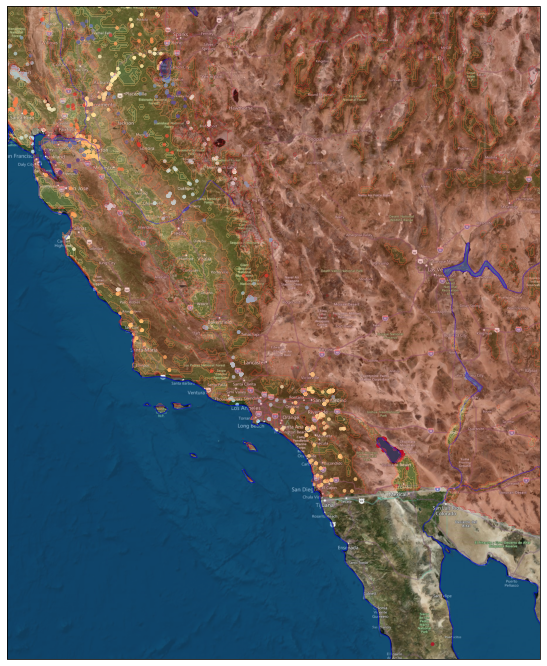

In [13]:
map_tiles = map_tiles_dictionary[basemap_name]

fig = plt.figure(figsize=(12, 12), facecolor="none")

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_tiles.crs)

# Set the size of the map
ax.set_extent(map_extent)
# Add the on-demand image - the second argument is the resolution and needs to be balanced with the 
# size of the area the map covers. 

ax.add_image(map_tiles, 8)
ax.add_feature(coastline, linewidth=1.5,  edgecolor="Black", zorder=1, alpha=0.5)
for feature in water_features:
    ax.add_feature(feature,    linewidth=1.0,  edgecolor="Blue",  zorder=2, alpha=0.5)
    
## Add point data (lon, lat,colormapped variable, size variable)
ax.scatter(point_data[:,0], point_data[:,1], 10.0* point_data[:,3], c=point_data[:,2], marker='o', 
               cmap=cm.RdYlBu_r, alpha = 0.85, linewidth=0.5, transform=ccrs.Geodetic())

## Add raster data as contours
### alpha value was lowered to allow visibility of both point and raster data

cf = ax.contourf(raster[:,:,0], raster[:,:,1], raster[:,:,2], 
         levels = np.arange(0.5,250,10), vmin=0, vmax=150,
         transform=ccrs.PlateCarree(),  cmap="RdYlBu",zorder=2, alpha=0.25)



In [12]:
fig.savefig("LA_Basin_Map.png", dpi=600)

See how well that worked by opening the [full-size image](./LA_Basin_Map.png). 

There really is a lot of detail available, but you can also see how long it takes to download and build the different resolutions. There is something of an art to finding the right balance. 

You may also find that very high resolution output results in memory errors. If so, restart the kernel and try again with a small image or lower dpi.